In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import math

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

import sklearn 
from sklearn.metrics import confusion_matrix

import IvysaurusModel
import FileHelper

In [2]:
file = uproot.open('/Users/isobel/Desktop/DUNE/Ivysaurus/files/IvysaurusTrainingFiles_numu.root')
tree = file['ivyTrain/ivysaur']
branches = tree.arrays()
#print(tree.keys())

# How many entries do we have?
print("Got a total of ", len(branches), " PFParticle images")
print("Buuuuut... some will be empty")

Got a total of  4  PFParticle images
Buuuuut... some will be empty


In [3]:
# Here we'll put some hyperparameters...

dimensions = 5 # I should write this into the files...
nClasses = 6

ntrain = 1
ntest  = 2

nEpochs = 10
batchSize = 128
learningRate = 1e-4

In [6]:
# Read tree

startGridU, startGridV, startGridW, endGridU, endGridV, endGridW, y = FileHelper.readTree(branches, dimensions, nClasses)

In [8]:
# Gunna have to do test/train splitting here...

# This should shuffle things so that the indicies are still linked
startGridU, startGridV, startGridW, endGridU, endGridV, endGridW, y = sklearn.utils.shuffle(startGridU, startGridV, startGridW, endGridU, endGridV, endGridW, y)

startGridU_train = startGridU[:ntrain]
startGridV_train = startGridV[:ntrain]
startGridW_train = startGridW[:ntrain]

startGridU_test = startGridU[ntrain:(ntrain + ntest)]
startGridV_test = startGridV[ntrain:(ntrain + ntest)]
startGridW_test = startGridW[ntrain:(ntrain + ntest)]

endGridU_train = endGridU[:ntrain]
endGridV_train = endGridV[:ntrain]
endGridW_train = endGridW[:ntrain]

endGridU_test = endGridU[ntrain:(ntrain + ntest)]
endGridV_test = endGridV[ntrain:(ntrain + ntest)]
endGridW_test = endGridW[ntrain:(ntrain + ntest)]

print(startGridU_train.shape)
print(startGridU_test.shape)

y_train = y[:ntrain]
y_test = y[ntrain:(ntrain + ntest)]

print(y_train.shape)
print(y_test.shape)

(1, 5, 5, 1)
(2, 5, 5, 1)
(1, 1)
(2, 1)


In [50]:
ivysaurusCNN = IvysaurusModel.IvysaurusIChooseYou(dimensions, nClasses)
ivysaurusCNN.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 5, 5, 1)]            0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 5, 5, 1)]            0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 3, 3, 32)             320       ['input_7[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 3, 3, 32)             320       ['input_8[0][0]']             
                                                                                            

In [51]:
# Define the optimiser and compile the model
optimiser = optimizers.legacy.Adam(learning_rate=learningRate)
ivysaurusCNN.compile(loss='categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

In [52]:
# Fit that model!

# Reduce the learning rate by a factor of ten when required
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6, verbose=1)
history = ivysaurusCNN.fit([startGridU_train, endGridU_train], y_train, batch_size = batchSize, 
    validation_data=([startGridU_test, endGridU_test], y_test), shuffle=True, epochs=nEpochs)

Epoch 1/10
1/1 [==============================] - 0s 161ms/step - loss: 1.7919 - accuracy: 0.0000e+00 - val_loss: 1.7914 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 1.7913 - accuracy: 1.0000 - val_loss: 1.7915 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 1.7908 - accuracy: 1.0000 - val_loss: 1.7917 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 1.7903 - accuracy: 1.0000 - val_loss: 1.7918 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 1.7899 - accuracy: 1.0000 - val_loss: 1.7919 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 1.7894 - accuracy: 1.0000 - val_loss: 1.7920 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 1.7889 - accuracy: 1.0000 - val_loss: 1.7921 - val_accuracy: 0.0000e+00


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


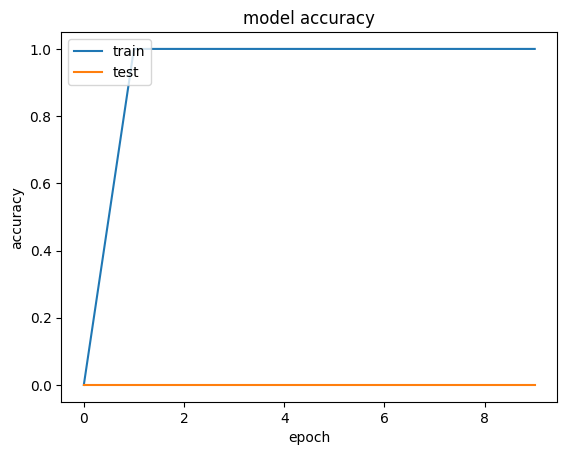

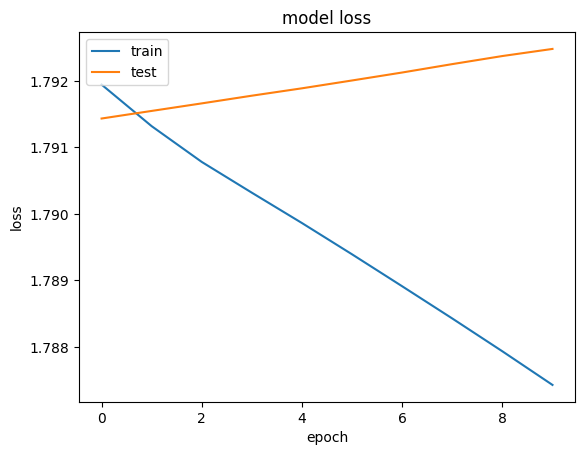

In [53]:
# Evaluate training

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
# Use the network to predict the category of the test sample

y_pred = ivysaurusCNN.predict([startGridU_test, endGridU_test])
confMatrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(confMatrix)

1/1 [==============================] - 0s 13ms/step
[[0 0]
 [2 0]]
